In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Tons de Verde
VERDE1, VERDE2, VERDE3, VERDE4, VERDE5 = '#1f3324', '#3d6647','#5c996b','#7acc8f','#99ffb2'
# Tons de Cinza
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#181819','#313132','#636364','#afafaf','#f8f8fa'
# Tons Complementares
COMPLEMENTAR1, COMPLEMENTAR2, COMPLEMENTAR3, COMPLEMENTAR4, COMPLEMENTAR5 = '#ff7373','#965A87','#107DAC','#EBA0AC','#f09537'

In [4]:
dados = pd.read_parquet("Dados Comercializacao.parquet")
# dados = dados.query("DATA >= '2024-06-17'")
dados

,DATA,NOME,PRODUTO,VOLUME,DIA DA SEMANA,MES,TIPO
3,2024-06-17,5500035-SERGIO COMERCIO DE OVOS,08901-OVO BRANCO CX30DZ,2000.00,Segunda-feira,Jun,ATACADISTA
4,2024-06-17,0500000-TRANSPORTADORES,01401-LARANJA BAIA (UMBIGO),630.00,Segunda-feira,Jun,ATACADISTA
5,2024-06-17,0500000-TRANSPORTADORES,01403-LARANJA LIMA (CEU),180.00,Segunda-feira,Jun,ATACADISTA
6,2024-06-17,0500000-TRANSPORTADORES,01406-LARANJA SUCO,720.00,Segunda-feira,Jun,ATACADISTA
7,2024-06-17,0500000-TRANSPORTADORES,01603-LIMAO TAITI,360.00,Segunda-feira,Jun,ATACADISTA
...,...,...,...,...,...,...,...
23436,2024-07-12,0116672-RAICA RAMONA FUHR,05601-REPOLHO VERDE,385.65,Sexta-feira,Jul,PRODUTOR
23437,2024-07-12,0116672-RAICA RAMONA FUHR,04501-ALFACE,63.00,Sexta-feira,Jul,PRODUTOR
23438,2024-07-12,0116672-RAICA RAMONA FUHR,10101-BATATA-DOCE,200.00,Sexta-feira,Jul,PRODUTOR
23439,2024-07-12,0600241-SERGIO JOSE BIRNFELD,01406-LARANJA SUCO,540.00,Sexta-feira,Jul,PRODUTOR


In [5]:
produtores = dados[dados['TIPO'] == 'PRODUTOR']
atacadista = dados[dados['TIPO'] == 'ATACADISTA']

In [9]:
total = produtores['VOLUME'].sum() + atacadista['VOLUME'].sum()

print(f"Produtores = {(produtores['VOLUME'].sum() / total) * 100}")
print(f"Atacadistas = {(atacadista['VOLUME'].sum() / total) * 100}")

Produtores = 26.664185460830005
Atacadistas = 73.33581453917


In [18]:
dados_filtrados = dados.groupby('PRODUTO')['VOLUME'].sum().reset_index()
dados_filtrados = dados_filtrados.sort_values(by=['VOLUME'], ascending=False)
dados_filtrados = dados_filtrados.head(10)
dados_filtrados

,PRODUTO,VOLUME
117,07404-TOMATE CAQUI LONGA VIDA,3407274.0
123,07701-BATATA INGLESA,2447055.0
151,10101-BATATA-DOCE,1571574.0
38,01802-MAMAO FORMOSA,1295385.0
6,00501-BANANA CATURRA / NANICA,1251893.0
8,00503-BANANA PRATA / BRANCA,1139930.0
22,01406-LARANJA SUCO,1124038.0
128,08001-CEBOLA NACIONAL,1123200.0
132,08102-CENOURA,1006526.0
116,07402-TOMATE ITALIANO / PAULISTA,1000510.0


In [25]:
def volume_produtos_ranking():
    top_7 = dados_filtrados.copy(deep=True)
    top_7 = top_7[['PRODUTO','VOLUME']]
    top_7 = top_7.loc[top_7['PRODUTO'] != "TODOS"]
    top_7['PRODUTO'] = top_7['PRODUTO'].str.replace('08050-CEBOLA IMPORTADA', '08001-CEBOLA NACIONAL')
    top_7 = top_7.groupby('PRODUTO').agg('sum').sort_values('VOLUME', ascending=False)
    top_7 = top_7[:10]
    top_7 = top_7.reset_index()
    top_7['PRODUTO'] = top_7['PRODUTO'].apply(lambda x: x[6:])
    top_7['PRODUTO'] = top_7['PRODUTO'].str.replace('LONGA VIDA','L.V').str.replace('COMUM / CAI','COMUM')
    
    # Área do gráfico e tema da visualização
    fig, ax = plt.subplots(figsize=(18,10))  # Aumenta o tamanho da figura
    fig.subplots_adjust(right=0.6, left=0.5)
    sns.set_theme(style="white")
    
    # Definindo as cores do Gráfico
    cores = ['#526a19', '#526a19', '#526a19', '#363636', '#363636', '#715439', '#9b836e']
    

    # Gerando o gráfico de barras
    ax = sns.barplot(data = top_7, x="VOLUME", y = 'PRODUTO', palette = cores)
    
    # Personalizando o gráfico
    ax.set_title('Top 10 produtos com maior volume comercializado', fontsize=18, color=CINZA1, loc='left', pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)  # Aumenta o tamanho da fonte das legendas
    
    sns.despine(left = True, bottom = True)
    
    # Escrevendo os valores de cada barra no gráfico
    for i, valor in enumerate(top_7['VOLUME']):
        qtd = f'{(valor/1000):,.0f} (ton)'.replace(',','.')
        offset = 1e3  # offset de 1.000
        ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

    fig.set_facecolor('white')
    ax.set_facecolor('white')
    # Ajustando o layout da figura
    fig.tight_layout()
    return ax, fig


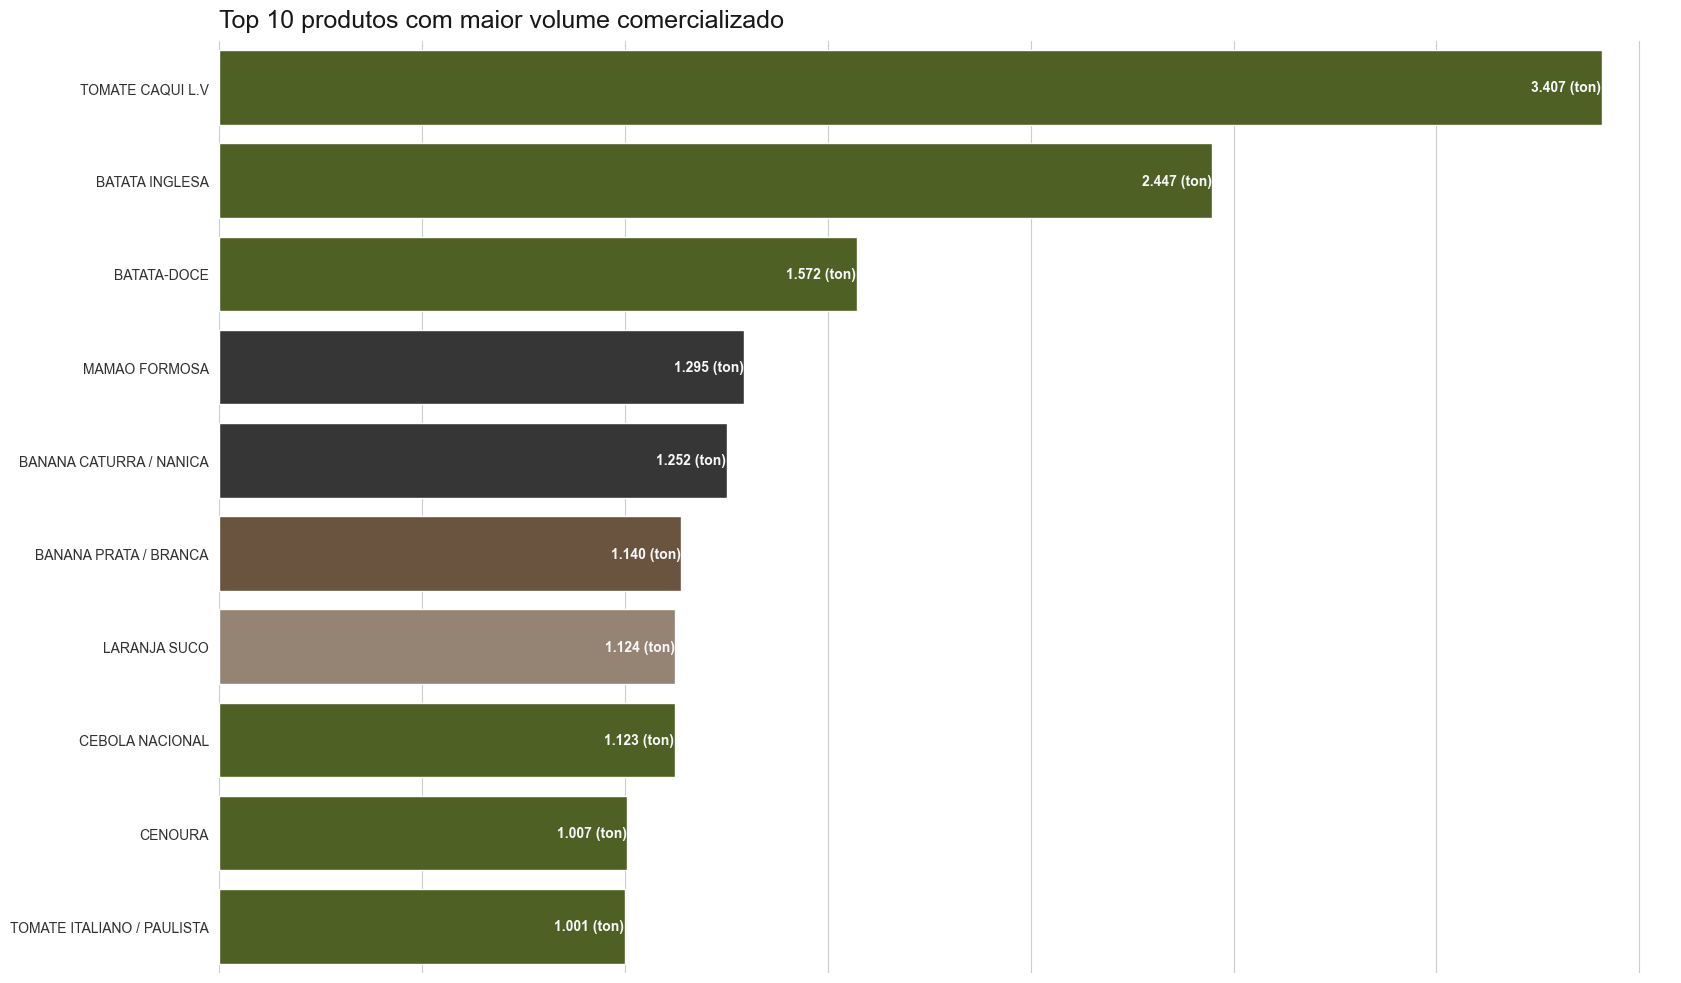

In [26]:
ax, fig = volume_produtos_ranking()
# fig.show()
fig.savefig("Ranking top 10.png")